In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
#loading data 

df = pd.read_csv('netflix_titles.csv')

In [5]:
df.shape

(7787, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [7]:
#cleaning of data 

df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [8]:
#using mode on country 

df['country'] = df['country'].fillna(df['country'].mode()[0])

In [9]:
# removing the null values present in rating , date_added from the data as it is less null values

df.dropna(subset=['date_added','rating'],inplace=True)

In [10]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2376
cast             718
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [13]:
# seperating the date data (( object -> datetime64 format ))

df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', dayfirst=True)

In [16]:
# extracting year and month 

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [18]:
# finding the distribution of content type 

df['type'].value_counts()

type
Movie      5372
TV Show    2398
Name: count, dtype: int64

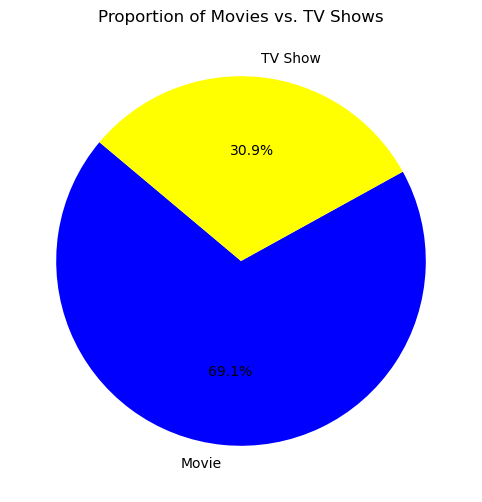

In [19]:
# drawing the pie chart for the content type 

plt.figure(figsize=(8,6))
type_counts = df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'yellow'])
plt.title('Proportion of Movies vs. TV Shows')
plt.ylabel('')
plt.show()

<Figure size 1400x800 with 0 Axes>

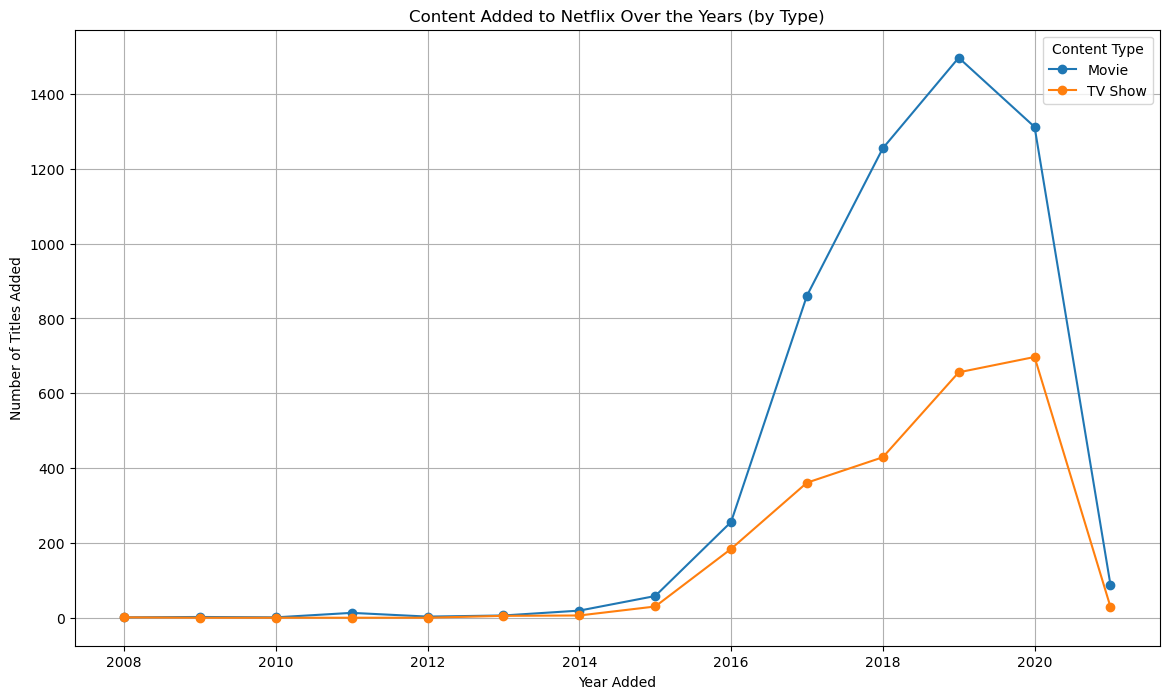

In [20]:
# content that is being added to Netflix over the years 

content_over_time = df.groupby(['year_added','type']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
content_over_time.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

In [21]:
# most popular genes 

df['listed_in'].value_counts()

listed_in
Documentaries                                                334
Stand-Up Comedy                                              321
Dramas, International Movies                                 320
Comedies, Dramas, International Movies                       243
Dramas, Independent Movies, International Movies             215
                                                            ... 
Sports Movies                                                  1
Crime TV Shows, TV Horror, TV Mysteries                        1
Children & Family Movies, Classic Movies, Dramas               1
Romantic TV Shows, Spanish-Language TV Shows, TV Comedies      1
Dramas, Faith & Spirituality, Sports Movies                    1
Name: count, Length: 491, dtype: int64

In [22]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


In [23]:
# spliting listed_in

df['listed_in'].str.split(', ')

0       [International TV Shows, TV Dramas, TV Sci-Fi ...
1                          [Dramas, International Movies]
2                   [Horror Movies, International Movies]
3       [Action & Adventure, Independent Movies, Sci-F...
4                                                [Dramas]
                              ...                        
7782                       [Dramas, International Movies]
7783     [Dramas, International Movies, Music & Musicals]
7784    [Documentaries, International Movies, Music & ...
7785                 [International TV Shows, Reality TV]
7786                    [Documentaries, Music & Musicals]
Name: listed_in, Length: 7770, dtype: object

In [24]:
# split the column and explode it 

genres = df.assign(genre=df['listed_in'].str.split(', ')).explode('genre')

In [27]:
# taking the top geners 

top_genres = genres['genre'].value_counts().reset_index()
top_genres.columns = ['genre','count']

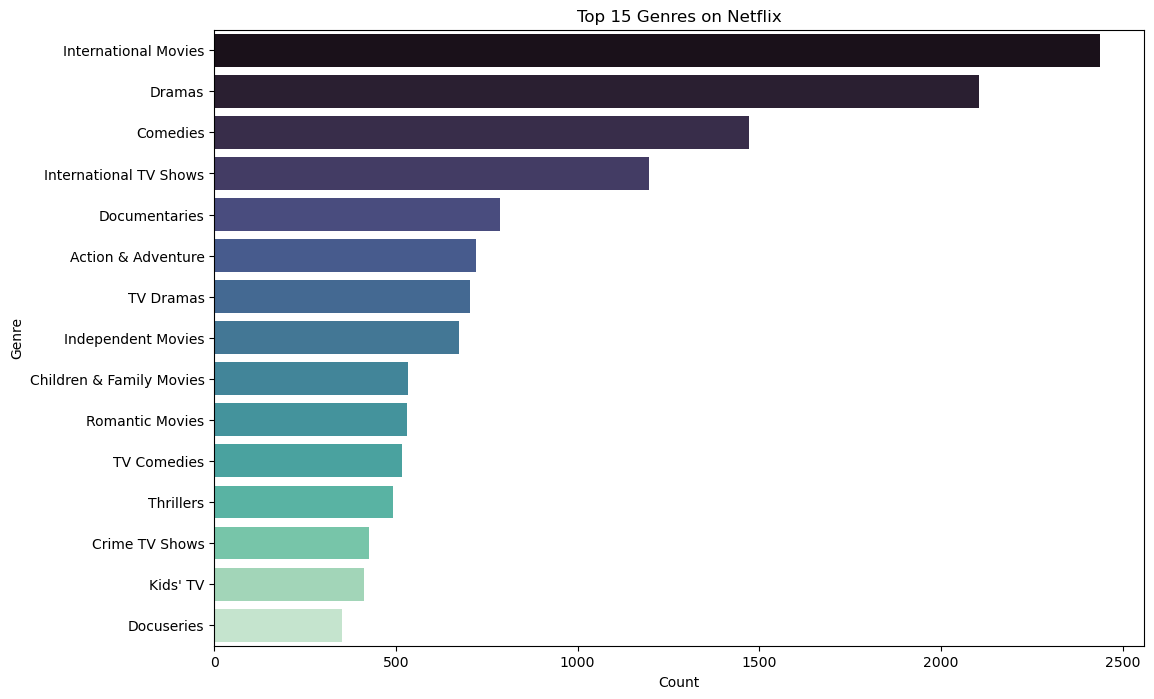

In [28]:
# taking the first 5 geners 

top_15_genres = top_genres.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y='genre', x='count', data=top_15_genres, palette='mako', hue='genre', legend=False)
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [29]:
# distributing the content to movies and tvshows 

movies_df = df[df['type'] == 'Movie'].copy()
tv_shows_df = df[df['type'] == 'TV Show'].copy()

In [30]:
# Clean and convert duration for movies
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)

# Clean and convert duration for TV shows
tv_shows_df['seasons'] = tv_shows_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

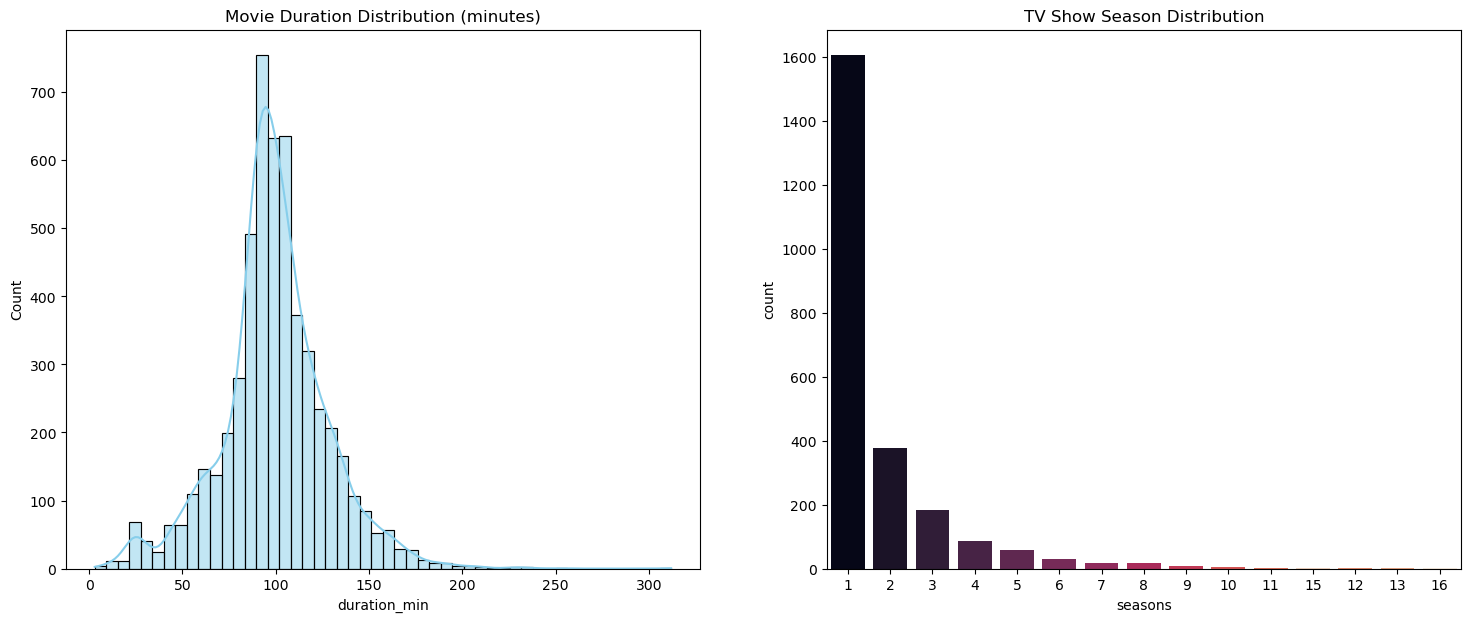

In [31]:
# Plot the distributions
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Movie Duration Distribution
sns.histplot(ax=axes[0], data=movies_df, x='duration_min', bins=50, kde=True, color='skyblue').set_title('Movie Duration Distribution (minutes)')

# TV Show Season Distribution
sns.countplot(ax=axes[1], x='seasons', data=tv_shows_df, palette='rocket', order=tv_shows_df['seasons'].value_counts().index, hue='seasons', legend=False).set_title('TV Show Season Distribution')

plt.show()

In [32]:
df['country'].value_counts()

country
United States                                     3051
India                                              923
United Kingdom                                     396
Japan                                              224
South Korea                                        183
                                                  ... 
Germany, United States, United Kingdom, Canada       1
Peru, United States, United Kingdom                  1
Saudi Arabia, United Arab Emirates                   1
United Kingdom, France, United States, Belgium       1
France, Norway, Lebanon, Belgium                     1
Name: count, Length: 681, dtype: int64

In [33]:
#spliting the multi-country to similer to geners 

countries = df.assign(country=df['country'].str.split(', ')).explode('country')

In [37]:
# Getting the top countries and their counts

top_countries_counts = countries['country'].value_counts().reset_index()
top_countries_counts.columns = ['country', 'count'] # Rename columns for clarity

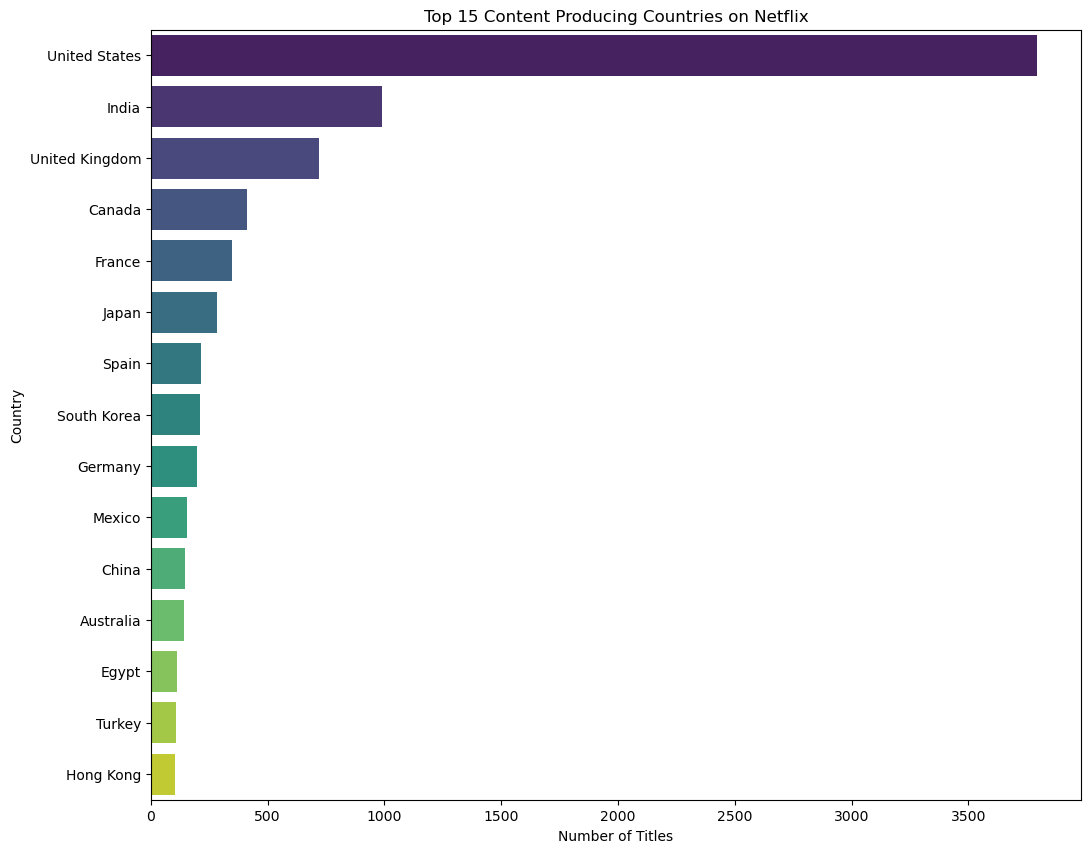

In [38]:
# Select only the top 15 for plotting

top_countries_counts_plot = top_countries_counts.head(15)

plt.figure(figsize=(12, 10))
sns.barplot(y='country', x='count', data=top_countries_counts_plot, palette='viridis', hue='country', legend=False)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

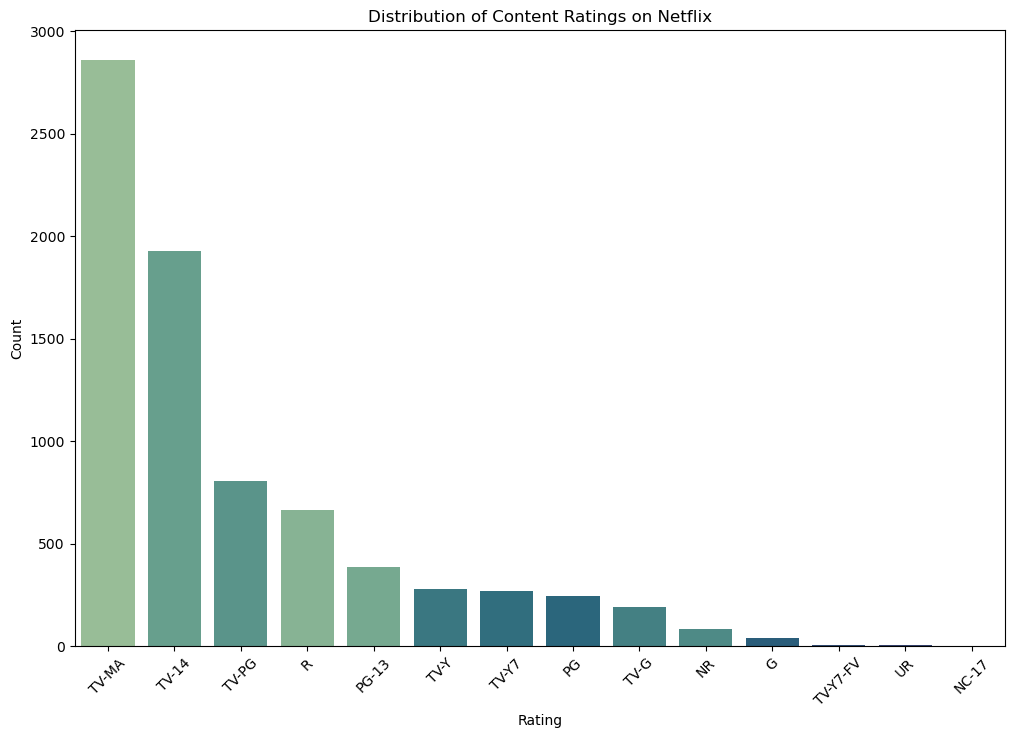

In [39]:
# taking the maturity rating on the contents 

plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [40]:
df['description']

0       In a future where the elite inhabit an island ...
1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
                              ...                        
7782    When Lebanon's Civil War deprives Zozo of his ...
7783    A scrappy but poor boy worms his way into a ty...
7784    In this documentary, South African rapper Nast...
7785    Dessert wizard Adriano Zumbo looks for the nex...
7786    This documentary delves into the mystique behi...
Name: description, Length: 7770, dtype: object

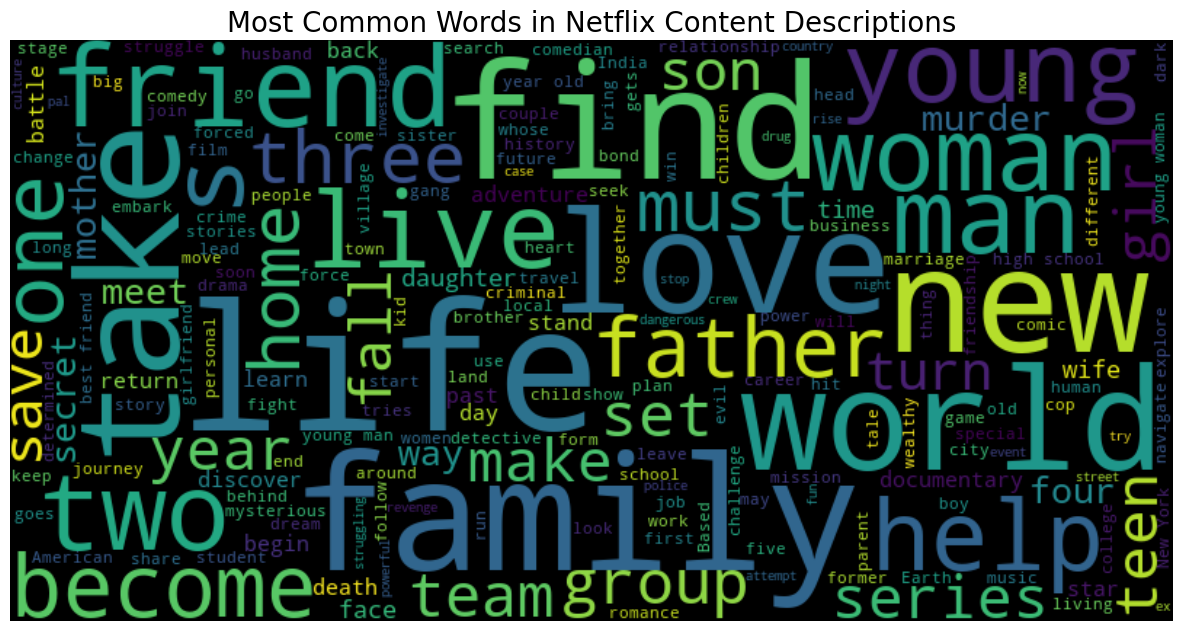

In [41]:
# word cloud

# Combine all descriptions into a single string
text = ' '.join(df['description'])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

how has the distribution of content ratings changed over time?

<Figure size 1400x800 with 0 Axes>

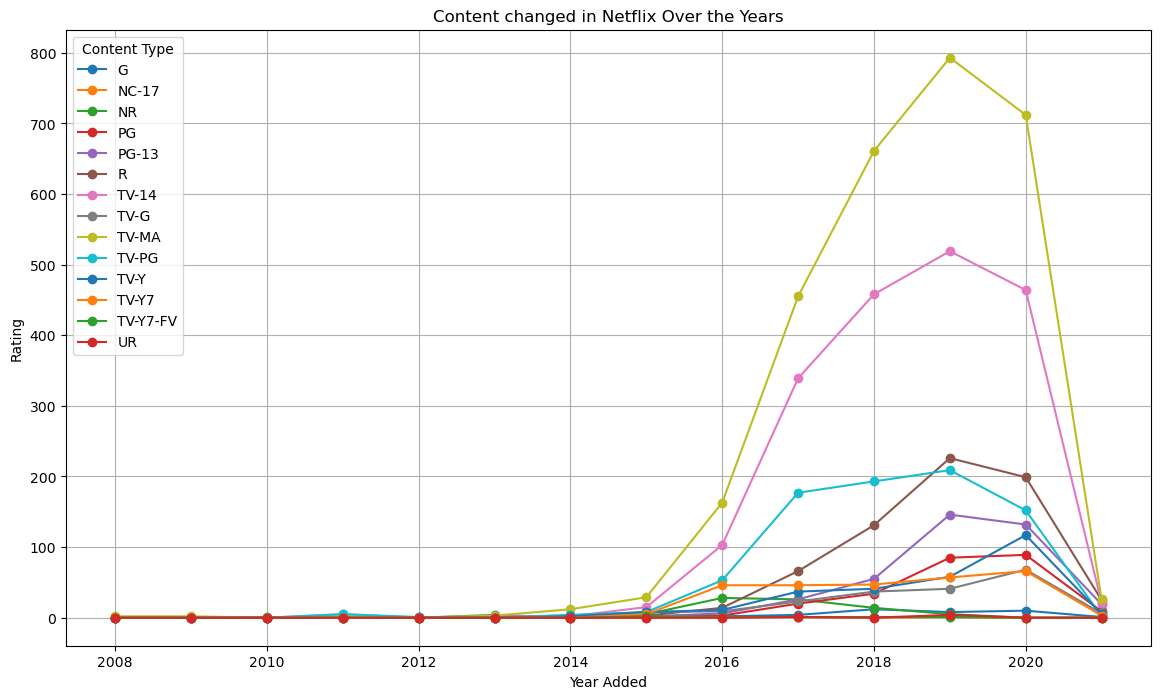

In [46]:
# crating the chart for content rating changed over time 

content_over_time = df.groupby(['year_added','rating']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
content_over_time.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Content changed in Netflix Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Rating')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()


<Figure size 1400x800 with 0 Axes>

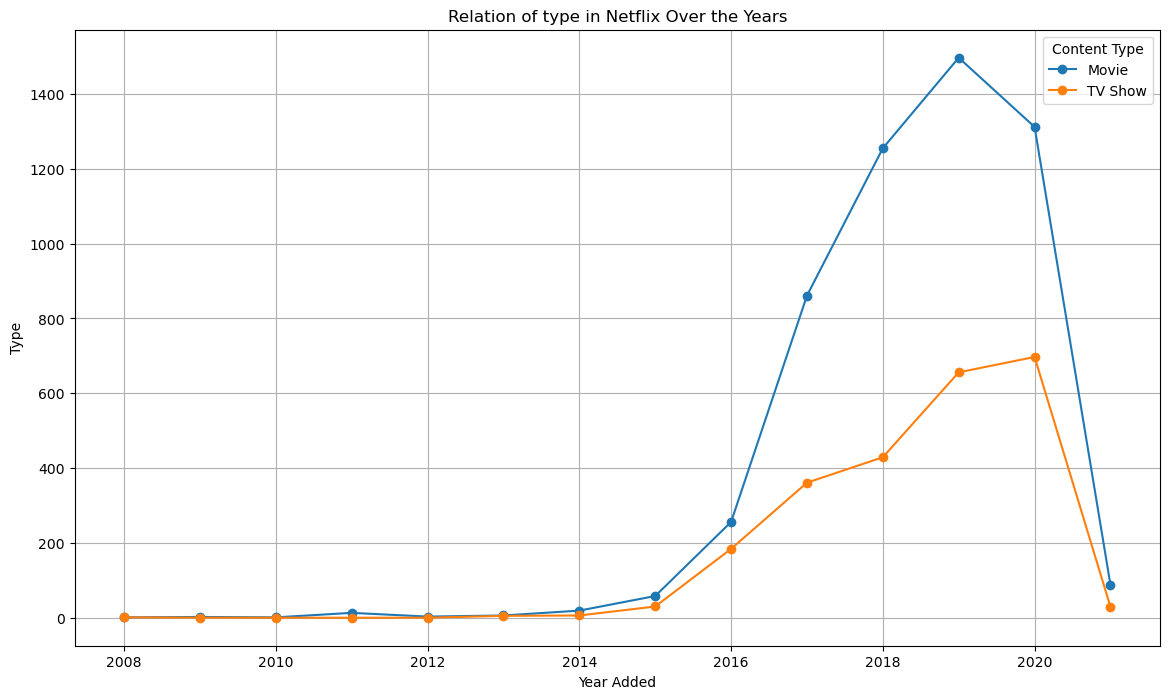

In [47]:
content_over_time = df.groupby(['year_added','type']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
content_over_time.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Relation of type in Netflix Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Type')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()


From 2015 to 2019, both movies and TV shows added on Netflix surged, but movies consistently outnumbered TV shows. After 2019, additions sharply dropped for both types, showing Netflix's preference for movies during its peak growth.

can we identify any trends in content production based on the release year vs the year added to netflix ?

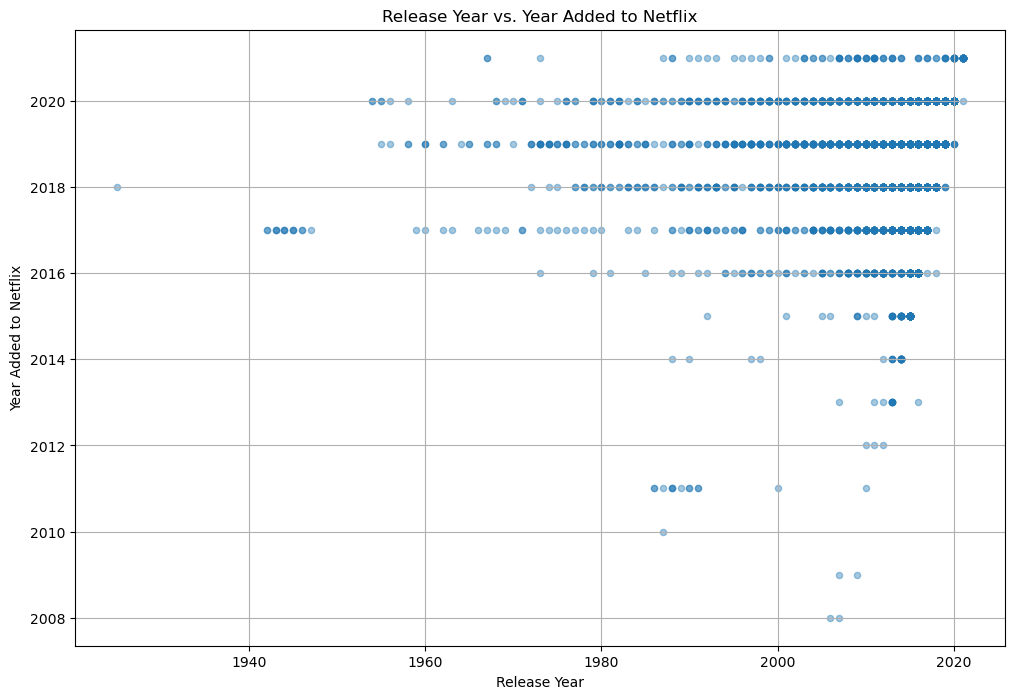

In [51]:
release_vs_added = df.groupby(['release_year', 'year_added']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
plt.scatter(df['release_year'], df['year_added'], alpha=0.4, s=20)
plt.xlabel('Release Year')
plt.ylabel('Year Added to Netflix')
plt.title('Release Year vs. Year Added to Netflix')
plt.grid(True)
plt.show()

The scatter plot illustrates the relationship between the year of release and the year content was added to Netflix. There is a noticeable concentration of points in recent years, indicating that newer titles are added to the platform relatively quickly after release. However, there is also a spread of older titles (from previous decades) being added to Netflix, especially between 2015 and 2020, reflecting a period when Netflix expanded its catalog by acquiring a mix of both recent and classic content. After 2020, fewer older titles seem to be added, suggesting a stronger focus on acquiring or releasing contemporary content during that period.

who are the top directors on Netflix ?

In [60]:
df['director'].value_counts()

director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
                          ..
Michael Kennedy            1
Robert McCullough Jr.      1
Ryan Koo                   1
Frank Ariza                1
Swapnaneel Jayakar         1
Name: count, Length: 4047, dtype: int64

In [61]:
df['director'].value_counts().index[0]

'Raúl Campos, Jan Suter'

'Raúl Campos, Jan Suter' is the top director in Netflix having more movies 